<a href="https://colab.research.google.com/github/kangdoung/CS114.K21/blob/master/do_an_cuoi_ky/Classify_face_celeb_svc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bài toán nhận dạng người nổi tiếng**
* Input: ảnh của 1 trong 5 người  
* Output: tên người nổi tiếng của ảnh đó  
* Dataset gồm ảnh của 5 người: Amee, My Tam,Son Tung MTP, Jack và NDLN.  
Dữ liệu được thu thập từ google image sau đó được cắt và lấy khuôn mặt của mỗi người trên. Thu thập 100 tấm ảnh của mỗi người sau đó được gia tăng bằng phương phấp xoay ngược lại của image_generator. Do đó mỗi người có 200 tấm ảnh. Bộ Dataset gồm 1000 tấm chia thành 2 tập train và test theo tỉ lệ 8:2.  
Dataset được lưu trên google drive ( [*link*](/https://drive.google.com/drive/folders/1YjNGdPb_3equCM7M4tBaXYQpUN8AFIMd?usp=sharing)).


In [85]:
import numpy as np
import pandas as pd
import cv2 #open cv
import os
import matplotlib.pyplot as plt

In [ ]:
# scaling all images to 80 * 80 using OpenCV resize function
i = 0
for imgfolder in os.listdir('drive/My Drive/Data1000/Train/'):
    for filename in os.listdir('drive/My Drive/Data1000/Train/' + imgfolder):
        filename = 'drive/My Drive/Data1000/Train/' + imgfolder+ '/'+ filename
        img=cv2.imread(filename,0)
        img = cv2.resize(img, (80,80), interpolation = cv2.INTER_AREA)
        print(i)
        i+=1

# Load dữ liệu và gán label cho dữ liệu

## Train set


In [113]:
# building an array of images and finding its shape.
Images_train = []
for imgfolder in os.listdir('drive/My Drive/Data1000/Train/'):
    for filename in os.listdir('drive/My Drive/Data1000/Train/' + imgfolder):
        filename = 'drive/My Drive/Data1000/Train/' + imgfolder + '/' + filename
        #print(filename)
        img = cv2.imread(filename,0)
        img = cv2.resize(img, (80,80), interpolation = cv2.INTER_AREA)
        Images_train.append(img)
Images_train = np.asarray(Images)
Images_train.shape

(800, 80, 80)

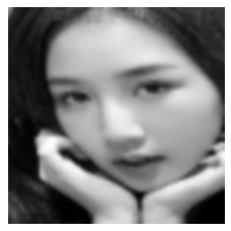

In [89]:
plt.imshow(Images_train[20], cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [114]:
label_train = []
for imgfolder in os.listdir('drive/My Drive/Data1000/Train/'):
    for filename in os.listdir('drive/My Drive/Data1000/Train/' + imgfolder):
        label_train.append(imgfolder)
label_train = np.asarray(label_train)
label_train.shape

(800,)

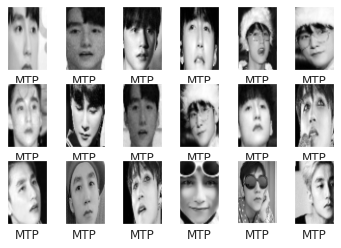

In [95]:
#display training images and labels to make sure they lineup correctly
%matplotlib inline
import seaborn as sns; sns.set()

fig,ax = plt.subplots(3,6)
for i, axis in enumerate(ax.flat):
    axis.imshow(X_images[i], cmap= 'gray')
    axis.set(xticks = [], yticks=[], xlabel=y_train[i])

## Test set

In [ ]:
#Build array of images for Test/Validation dataset
Images_test = []
for imgfolder in os.listdir('drive/My Drive/Data1000/Test/'):
    i = 0
    for filename in os.listdir('drive/My Drive/Data1000/Test/' + imgfolder):
         if(filename.endswith('.jpg')):
                filename = 'drive/My Drive/Data1000/Test/' + imgfolder + '/' + filename
                #print(filename)
                img = cv2.imread(filename,0) 
                img = cv2.resize(img, (80,80), interpolation = cv2.INTER_AREA)
                Images_test.append(img)
                print(i)
                i+=1
                
    
Images_test = np.asarray(Images_test)
Images_test.shape

In [116]:
Images_test.shape

(200, 80, 80)

In [117]:
#Building a 1D array of test labels
label_test = []
for imgfolder in os.listdir('drive/My Drive/Data1000/Test/'):
    for filename in os.listdir('drive/My Drive/Data1000/Test/' + imgfolder):
        label_test.append(imgfolder)
label_test = np.asarray(label_test)
label_test.shape

(200,)

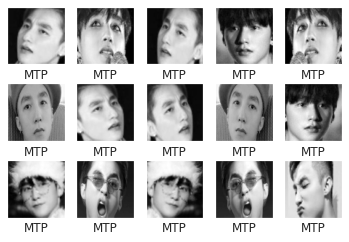

In [102]:
#display test images and labels to make sure they lineup correctly
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(Images_test[i], cmap='gray')
    axi.set(xticks=[], yticks=[],
            xlabel=label_test[i])

### Khác

In [118]:
X_train = Images_train
X_test = Images_test
Y_train = label_train  
Y_test = label_test 

## Model


In [104]:
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

Thêm các thư viện cần thiết

In [105]:
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [119]:
#flatten images.
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

In [120]:
from sklearn.model_selection import learning_curve, GridSearchCV

In [121]:
# doing cross validation to tune the params of SVC

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(X_train, Y_train)
print(grid.best_params_)

CPU times: user 1min 53s, sys: 19.7 s, total: 2min 13s
Wall time: 1min 9s
{'svc__C': 5, 'svc__gamma': 0.005}


In [122]:
grid.best_score_

0.5674999999999999

In [123]:
# pick the best model from the grid search above and use it to classify the test dataset
model = grid.best_estimator_
pred = model.predict(X_test)

In [124]:
from sklearn.metrics import  accuracy_score
from sklearn.metrics import classification_report

In [125]:
print(classification_report(pred,Y_test))

              precision    recall  f1-score   support

        Amee       0.57      0.46      0.51        50
        Jack       0.62      0.81      0.70        31
         MTP       0.55      0.56      0.56        39
       MyTam       0.50      0.51      0.51        39
        NDLN       0.53      0.51      0.52        41

    accuracy                           0.56       200
   macro avg       0.55      0.57      0.56       200
weighted avg       0.55      0.56      0.55       200



In [128]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(pred, Y_test))

[[23  4  2 10 11]
 [ 0 25  5  0  1]
 [ 4  4 22  5  4]
 [11  0  5 20  3]
 [ 2  7  6  5 21]]


In [127]:
accuracy_score(pred, Y_test)

0.555

### Nhận xét:
model cho kết quả dự đoán khá thấp do chỉ sử dụng PCA để trích chọn đặc trưng.

# CNN



In [129]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout

## Chia tập train thành 2 tập train và validation.

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
Xtrain, Ytrain, Xval, YVal = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 42)

In [134]:
print(Xtrain.shape)
print(Ytrain.shape)
print(Xval.shape)
print(YVal.shape)

(640, 6400)
(160, 6400)
(640,)
(160,)


## Xây dựng model

In [68]:
image_size = 216
num_steps = 500
batch_size = 128
display_step = 10

# Network Parameters
num_input = 42*67
num_classes = 5

In [69]:
model = keras.Sequential([
  Conv2D(16,3, padding = 'same', activation = 'relu', input_shape = (67,42,1)),
  MaxPooling2D(),
  Conv2D(32,3, padding = 'same', activation = 'relu'),
  MaxPooling2D(),
  Conv2D(64,3, padding= 'same', activation = 'relu'),
  MaxPooling2D(),
  Dropout(0.2),
  Flatten(),
  Dense(5, activation='softmax')

])

NameError: ignored

In [ ]:
conv1 = tf.layers.conv2d(x, 8, 5, activation=tf.nn.relu)
  conv1 = tf.layers.max_pooling2d(conv1, 4, 4)
  conv2 = tf.layers.conv2d(conv1, 16, 5, activation=tf.nn.relu)
  conv2 = tf.layers.max_pooling2d(conv2, 4, 4)
  conv3 = tf.layers.conv2d(conv2, 32, 3, activation=tf.nn.relu)
  conv3 = tf.layers.max_pooling2d(conv3, 2, 2)

  fc1 = tf.contrib.layers.flatten(conv3)
  fc1 = tf.layers.dense(fc1, 256)
  out = tf.layers.dense(fc1, num_classes)